In [2]:
# Importing the libraries
from RBM import RBM
import torch 
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader

import matplotlib
import matplotlib.pyplot as plt

import math
import numpy as np

In [3]:
#Loading MNIST dataset
mnist_data = datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose(
                    [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))

100.0%


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100.0%

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw




35.8%

100.0%


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100.0%

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [11]:
# Need to convert th data into binary variables
mnist_data.data = (mnist_data.data.type(torch.FloatTensor)/255).bernoulli()
mnist_data.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [13]:
mnist_data.targets.shape

torch.Size([60000])

The number shown is the number: 5


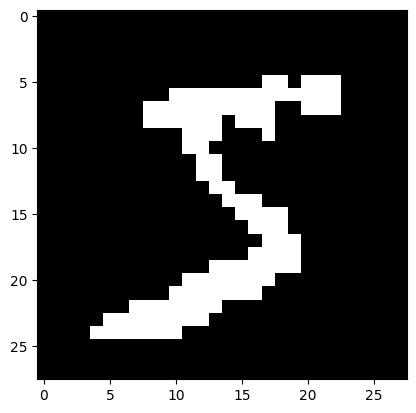

In [10]:
#Lets us visualize a number from the data set
idx = 0
img = mnist_data.data[idx]
print("The number shown is the number: {}".format(mnist_data.targets[idx]) )
plt.imshow(img , cmap = 'gray')
plt.show()

In [14]:
# If we train on the whole set we expect it to learn to detect edges.
batch_size= 10
tensor_x = mnist_data.data.type(torch.FloatTensor) # transform to torch tensors
tensor_y = mnist_data.targets.type(torch.FloatTensor)
_dataset = torch.utils.data.TensorDataset(tensor_x,tensor_y) # create your datset
train_loader = torch.utils.data.DataLoader(_dataset,
                    batch_size=batch_size, shuffle=True,drop_last = True)

In [17]:
# I have have set these hyper parameters although you can experiment with them to find better hyperparameters.
visible_units=28*28
hidden_units = 500
k=3  # n_gibbs_sampling_steps
learning_rate=0.01
learning_rate_decay = True
xavier_init = True
increase_to_cd_k = False
use_gpu = False


rbm_mnist = RBM(visible_units,hidden_units,k ,learning_rate,learning_rate_decay,xavier_init,
                increase_to_cd_k,use_gpu)

In [18]:
epochs = 30

rbm_mnist.train(train_loader , epochs,batch_size)

RBM fitting: 6000it [00:19, 309.24it/s]
Epoch:1 ,avg_cost = 0.008101996965706348 ,std_cost = 0.05969955399632454 ,avg_grad = 405.39508056640625 ,std_grad = 1815.72998046875
RBM fitting: 6000it [00:19, 301.04it/s]
Epoch:2 ,avg_cost = 0.005085095763206482 ,std_cost = 0.002586220158264041 ,avg_grad = 223.7167510986328 ,std_grad = 55.0236701965332
RBM fitting: 6000it [00:18, 318.30it/s]
Epoch:3 ,avg_cost = 0.005084809847176075 ,std_cost = 0.0025781458243727684 ,avg_grad = 221.09707641601562 ,std_grad = 55.246150970458984
RBM fitting: 6000it [00:19, 302.14it/s]
Epoch:4 ,avg_cost = 0.0050849299877882 ,std_cost = 0.0025694442447274923 ,avg_grad = 221.389892578125 ,std_grad = 55.01272201538086
RBM fitting: 6000it [00:20, 293.53it/s]
Epoch:5 ,avg_cost = 0.005084797274321318 ,std_cost = 0.0026169142220169306 ,avg_grad = 220.06182861328125 ,std_grad = 56.021846771240234
RBM fitting: 6000it [00:18, 319.05it/s]
Epoch:6 ,avg_cost = 0.0050848242826759815 ,std_cost = 0.0025891349650919437 ,avg_grad = 

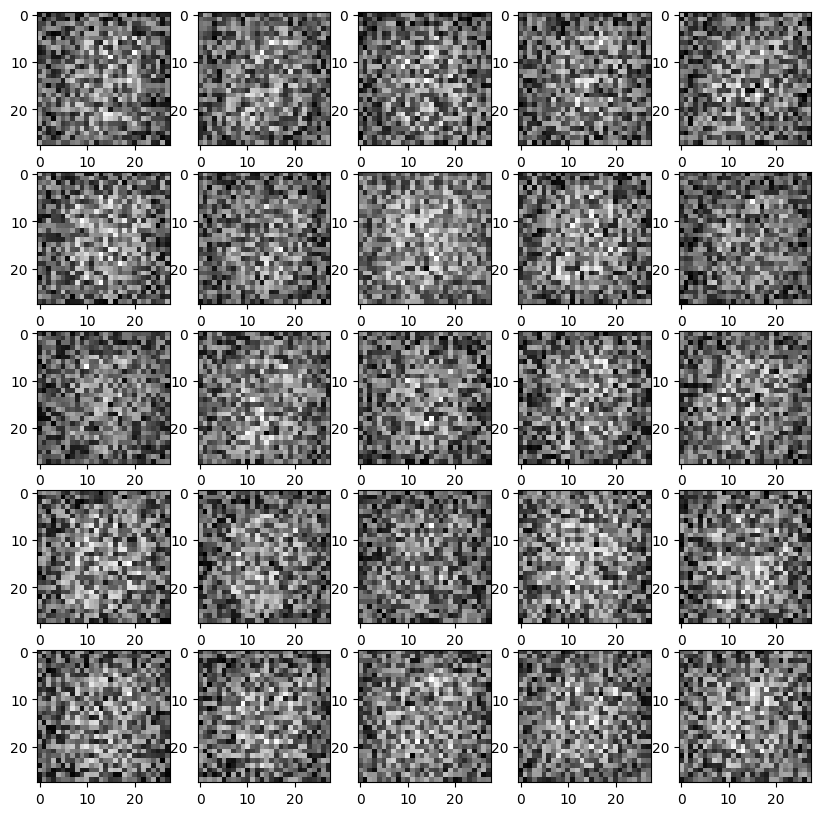

In [19]:
learned_weights = rbm_mnist.W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((28,28)), cmap=plt.cm.gray)
plt.show()

In [21]:
#This is an unsupervised learning algorithm. So let us try training on one particular number.But first
# we need to seperate the data.

number = 5 #A number between 0 and 10.

particular_mnist = []

limit = mnist_data.data.shape[0]
# limit = 60000
for i in range(limit):
    if(mnist_data.targets[i] == number):
        particular_mnist.append(mnist_data.data[i].numpy())
# particular_mnist = np.array(particular_mnist)
len(particular_mnist)
# mnist_data.train_data

5421

In [22]:
tensor_x = torch.stack([torch.Tensor(i) for i in particular_mnist]).type(torch.FloatTensor)
tensor_y = torch.stack([torch.Tensor(number) for i in range(len(particular_mnist))]).type(torch.FloatTensor)


In [23]:
mnist_particular_dataset = torch.utils.data.TensorDataset(tensor_x,tensor_y)
mnist_particular_dataloader = torch.utils.data.DataLoader(mnist_particular_dataset,batch_size = batch_size,drop_last=True,num_workers=0)

In [24]:
visible_units=28*28
hidden_units = 500
k=3
learning_rate=0.01
learning_rate_decay = False
xavier_init = True
increase_to_cd_k = False
use_gpu = False


rbm_mnist = RBM(visible_units,hidden_units,k ,learning_rate,learning_rate_decay,xavier_init,
                increase_to_cd_k,use_gpu)


epochs = 10

rbm_mnist.train(mnist_particular_dataloader , epochs)

RBM fitting: 542it [00:01, 321.22it/s]
Epoch:1 ,avg_cost = 0.05911860242486 ,std_cost = 0.24620698392391205 ,avg_grad = 1802.688232421875 ,std_grad = 4356.2861328125
RBM fitting: 542it [00:01, 280.89it/s]
Epoch:2 ,avg_cost = 0.004955894313752651 ,std_cost = 0.0026404173113405704 ,avg_grad = 267.90997314453125 ,std_grad = 49.19600296020508
RBM fitting: 542it [00:01, 274.52it/s]
Epoch:3 ,avg_cost = 0.0049445657059550285 ,std_cost = 0.002642405452206731 ,avg_grad = 202.00991821289062 ,std_grad = 37.595916748046875
RBM fitting: 542it [00:01, 293.92it/s]
Epoch:4 ,avg_cost = 0.004942487459629774 ,std_cost = 0.002643057843670249 ,avg_grad = 177.29258728027344 ,std_grad = 35.635623931884766
RBM fitting: 542it [00:01, 292.33it/s]
Epoch:5 ,avg_cost = 0.00494150398299098 ,std_cost = 0.002643434563651681 ,avg_grad = 164.8550567626953 ,std_grad = 34.873435974121094
RBM fitting: 542it [00:02, 256.92it/s]
Epoch:6 ,avg_cost = 0.004940938204526901 ,std_cost = 0.002643304644152522 ,avg_grad = 157.803680

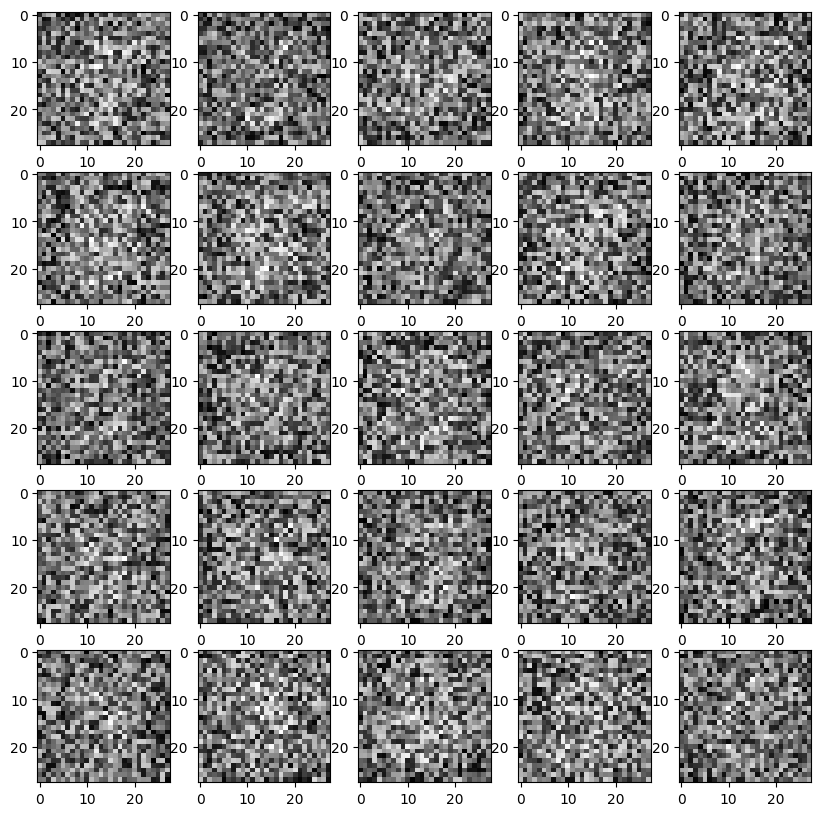

In [25]:
# This shows the weights for each of the 64 hidden neurons and give an idea how each neuron is activated.

learned_weights = rbm_mnist.W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i, :].reshape((28,28)), cmap=plt.cm.gray)
plt.show()

The original number: 3


/home/huzuntao/PycharmProjects/DBN-AE/venv/lib/python3.8/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


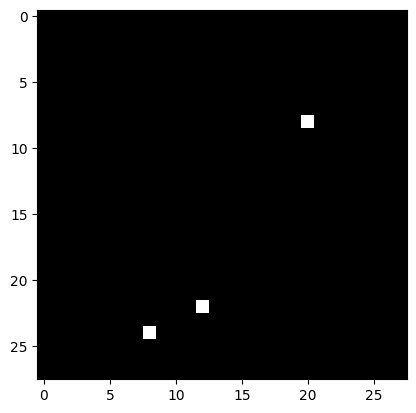

The reconstructed image


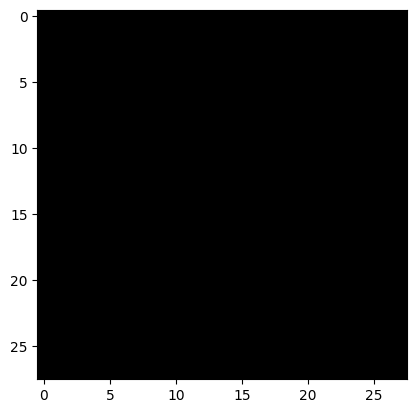

In [26]:
#Lets try reconstructing a random number from this model which has learned 5
idx = 7
img = mnist_data.data[idx]
reconstructed_img = img.view(-1).type(torch.FloatTensor)

# _ , reconstructed_img = rbm_mnist.to_hidden(reconstructed_img)
# _ , reconstructed_img = rbm_mnist.to_visible(reconstructed_img)

_,reconstructed_img = rbm_mnist.reconstruct(reconstructed_img,1)
# print(reconstructed_img)
reconstructed_img = reconstructed_img.view((28,28))
print("The original number: {}".format(mnist_data.train_labels[idx]))
plt.imshow(img , cmap = 'gray')
plt.show()
print("The reconstructed image")
plt.imshow(reconstructed_img , cmap = 'gray')
plt.show()